In [1]:
from core import *
import os , random

directory = '/home/mmed/Documents/projects/bill_reader/data'
bill = random.choice(os.listdir(directory))
file =os.path.join(directory, bill)
fig_size = [6.4, 4.8]
print(bill)

dennys_318879.pdf


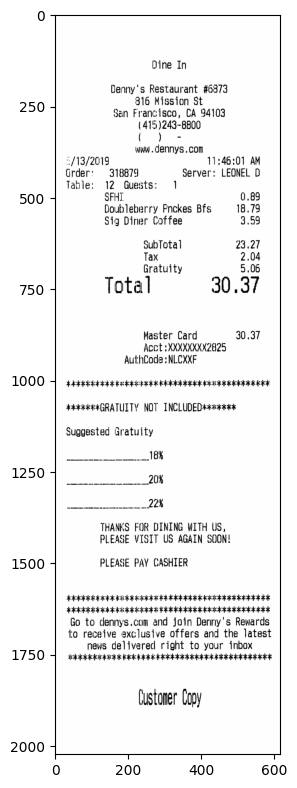

(2023, 617, 3)


In [2]:

plt.rcParams["figure.figsize"] = [2 * x for x in fig_size]
image = get_final_image(file)
plt.imshow(image)
plt.show()
print(image.shape)

In [3]:

results = ts.image_to_data(image, 
output_type=Output.DICT)
df = pd.DataFrame(data= results)
df = df[df.text != '']
df = df.apply(clean_the_text,axis= 1)
product_lines = get_lines(df)
del_suffix(product_lines)
additional_data = process_additional_data(product_lines)
to_del = []
for line in product_lines:
    if line >= additional_data['limit']:
        to_del.append(line)
for line in to_del:
    product_lines.pop(line)
isolate_products(product_lines)
formats = []
for line in product_lines:
    formats.append(get_format(product_lines[line]))
chosen_format = most_frequent(formats)
product_list = pd.DataFrame(columns=chosen_format)
for line in product_lines:
    if follow_format(product_lines[line],chosen_format):
        product_list.loc[len(product_list.index)] = get_data(product_lines[line],chosen_format)
additional_data['date'] = find_date(df)
additional_data['name'] = find_name(image)
print(additional_data)
product_list

{'state': '', 'subtotal': 23.27, 'costs': 7.100000000000001, 'total': 30.37, 'limit': 618, 'date': None, 'name': 'Dine In'}


,desc,price
0,SFHI,0.89
1,Doubleberry Pnckes Bfs,18.79
2,Sig Diner Coffee,3.59


In [4]:
additional_data

{'state': '',
 'subtotal': 23.27,
 'costs': 7.100000000000001,
 'total': 30.37,
 'limit': 618,
 'date': None,
 'name': 'Dine In'}

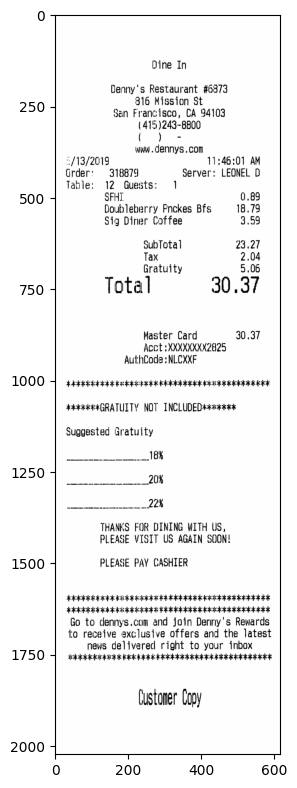

In [5]:
plt.imshow(image)
plt.show()